In [2]:
import pandas as pd

In [3]:
data_unlabeled = pd.read_csv('../data/reviews.tsv',sep='\t',error_bad_lines=False)
data_unlabeled

C:\Users\zulno\AppData\Local\Temp\ipykernel_15412\3909265631.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_unlabeled = pd.read_csv('../data/reviews.tsv',sep='\t',error_bad_lines=False)
Skipping line 43043: expected 2 fields, saw 3



,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."
...,...,...
49993,18984_0,The original Man Eater by Joe D'Amato is somew...
49994,16433_0,When Home Box Office was in it's early days mo...
49995,16006_0,Griffin Dunne was born into a cultural family....
49996,40155_0,"Not a bad story, but the low budget rears its ..."


In [19]:
data_labeled = pd.read_csv('../data/labeledTrainData.tsv/labeledTrainData.tsv',sep='\t')
data_labeled

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [20]:
data = data_labeled[['review','sentiment']]
data

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1
...,...,...
24995,It seems like more consideration has gone into...,0
24996,I don't believe they made this film. Completel...,0
24997,"Guy is a loser. Can't get girls, needs to buil...",0
24998,This 30 minute documentary Buñuel made in the ...,0


In [37]:
import re
''.join(re.findall('[A-Za-z". ]+',data.iloc[0][0]))

'With all this stuff going down at the moment with MJ ive started listening to his music watching the odd documentary here and there watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJs feeling towards the press and also the obvious message of drugs are bad mkay.br br Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.br br The actual feature film bit when it finally starts is only on for

In [38]:
import tensorflow as tf
from tensorflow import keras

In [112]:
from keras_preprocessing import text
from keras_preprocessing.sequence import pad_sequences
tokenizer = text.Tokenizer(40000,oov_token='<UNK>')
tokenizer.fit_on_texts(data.review.values)

In [114]:
tokenizer.num_words

40000

In [115]:
text_sequences = data.review.apply(lambda x:tokenizer.texts_to_sequences([x]))
text_sequences

0        [[17, 30, 12, 536, 168, 178, 31, 2, 559, 17, 1...
1        [[2, 354, 323, 5, 2, 3250, 32, 3735, 7694, 7, ...
2        [[2, 20, 515, 17, 4, 3023, 4560, 4011, 741, 23...
3        [[10, 213, 28, 4989, 13, 146, 35, 5516, 12, 20...
4        [[3539, 4350, 3, 1, 11312, 1353, 2226, 13424, ...
                               ...                        
24995    [[10, 184, 38, 51, 6706, 45, 823, 81, 2, 897, ...
24996    [[11, 90, 263, 34, 91, 12, 20, 338, 1747, 2, 8...
24997    [[230, 7, 4, 3354, 189, 77, 537, 737, 6, 1702,...
24998    [[12, 1086, 784, 660, 19935, 91, 9, 2, 400, 54...
24999    [[11, 217, 12, 18, 15, 4, 505, 3, 10, 3091, 59...
Name: review, Length: 25000, dtype: object

In [116]:
text_sequences = text_sequences.values
text_sequences.shape

(25000,)

In [117]:
text_sequences[0]

[[17,
  30,
  12,
  536,
  168,
  178,
  31,
  2,
  559,
  17,
  10087,
  205,
  643,
  2616,
  6,
  25,
  226,
  147,
  2,
  1029,
  660,
  131,
  3,
  48,
  294,
  2,
  19500,
  3,
  294,
  11586,
  172,
  277,
  11,
  41,
  179,
  6,
  77,
  4,
  811,
  2617,
  81,
  12,
  230,
  35,
  11,
  195,
  14,
  64,
  644,
  9,
  2,
  4253,
  41,
  6,
  277,
  95,
  54,
  59,
  328,
  724,
  27,
  7,
  2513,
  40,
  1352,
  11586,
  7,
  171,
  5035,
  171,
  789,
  20,
  61,
  11,
  375,
  168,
  6,
  65,
  31,
  2,
  435,
  52,
  10,
  14,
  1817,
  623,
  47,
  5,
  10,
  45,
  1300,
  3433,
  42,
  27632,
  545,
  947,
  2,
  3514,
  3,
  80,
  2,
  575,
  747,
  5,
  1665,
  24,
  76,
  1,
  8,
  8,
  2007,
  1157,
  19,
  5,
  262,
  12,
  7,
  30,
  42,
  486,
  1879,
  36,
  892,
  23,
  2589,
  38,
  10087,
  9,
  551,
  93,
  23,
  24,
  168,
  6,
  781,
  12,
  3,
  167,
  10,
  355,
  47,
  201,
  681,
  10087,
  33,
  27633,
  16,
  27634,
  6,
  2,
  229,
  5,
  12,
  18,
  19

In [134]:
import numpy as np
padded_text = np.array([pad_sequences(x,maxlen=2000)[0] for x in text_sequences])
padded_text.shape

(25000, 2000)

In [135]:
labels = data.sentiment.values
labels

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_text, labels,test_size=.2, random_state=0)
x_train.shape, y_train.shape

((20000, 2000), (20000,))

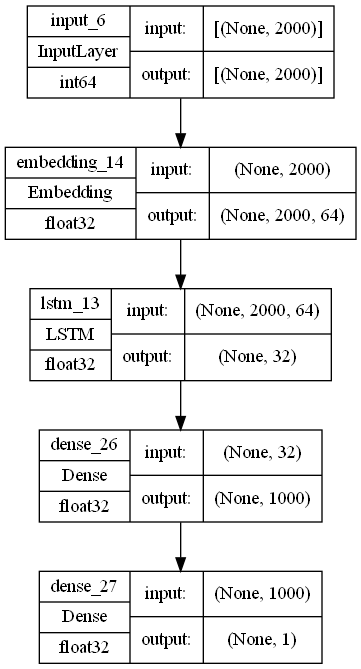

In [163]:
from keras import layers
model = keras.Sequential([
    layers.InputLayer(input_shape=(2000,),dtype=tf.int64),
    layers.Embedding(tokenizer.num_words,64),
    layers.LSTM(32,recurrent_dropout=.2,dropout=.2),
    layers.Dense(1000,activation='leaky_relu'),
    layers.Dense(1,activation='sigmoid'),
])
keras.utils.plot_model(model,show_dtype=True, show_shapes=True)

In [164]:
model.compile(keras.optimizers.Adam(decay=0.0001),'binary_crossentropy',['accuracy'])

In [165]:
model.fit(padded_text, labels,batch_size=64,epochs=100,validation_split=.2,validation_batch_size=64)

Epoch 1/100
313/313 [==============================] - 721s 2s/step - loss: 0.4420 - accuracy: 0.7772 - val_loss: 0.3007 - val_accuracy: 0.8820
Epoch 2/100
313/313 [==============================] - 837s 3s/step - loss: 0.1883 - accuracy: 0.9294 - val_loss: 0.3035 - val_accuracy: 0.8766
Epoch 3/100
  2/313 [..............................] - ETA: 16:36 - loss: 0.0860 - accuracy: 0.9844

KeyboardInterrupt: 